In [115]:
import pickle 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline 

<b> Search for Higgs Boson </b> 

We are going to use a set of training datasets to optimize event selections in order to enhance the discovery sensitivity. The optimal event selections will be applied to a selected pseudo-experiment data.

Each sample contains 14 features: ‘pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'. You can explore different strategies for event selection optimization using training samples. The optimal event selection will be applied to pseudo-experiment data.

## Low pT data

#### 5a.

In [116]:
qcd_file = pd.read_pickle(r'Data/qcd_100000_pt_250_500.pkl')
bkgd=pd.DataFrame(qcd_file, columns=['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])
bkgd.head(2)

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481


In [117]:
signal_file = pd.read_pickle(r'Data/higgs_100000_pt_250_500.pkl')
higgs=pd.DataFrame(signal_file, columns=['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])
higgs.head(2)

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650


#### 5b.

<u> Understanding Axes </u>


<b> pT </b> : (Transverse Momentum) Momentum perpendicular to the beam axis. Related to the invariant mass of particle. <br> <br>
<b> eta </b>: (Pseudorapidity)  Describes angle of particle relative to beam axis. <br>

> 


<b> Phi </b>: (Scattering Angle) : Phi is the angle between the x-axis and the particle. <br> <br>
<b> mass </b>: Invariant mass of particle. <br><br>
<b> KtDeltaR</b> :the distance between the last two merged jet constituents.<br><br>
<b> t2,t2,t3,t21,t32 </b>: 1-Subjettiness,2-Subjettiness,3-Subjettiness,2-to-1-Subjettiness,3-to-2-Subjettiness repectively.<br><br>
<b> EE2, EE3 </b> : 2nd and 3rd ECF Ratios respectively <br><br>
<b> D2 </b> (Energy Correlation Ratio) Useful for Boosted W/Z/H tagging <br><br>

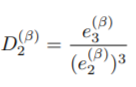


<b> Angularity </b> : Angularity



<b> 1. </b>

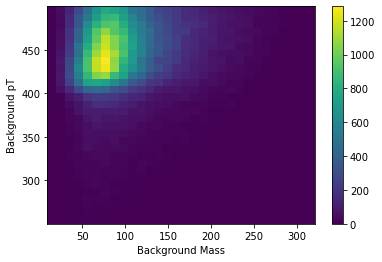

In [118]:
plt.hist2d(bkgd["mass"],bkgd["pt"],bins=[30,30])
plt.xlabel("Background Mass")
plt.ylabel("Background pT")
plt.colorbar()
plt.show()

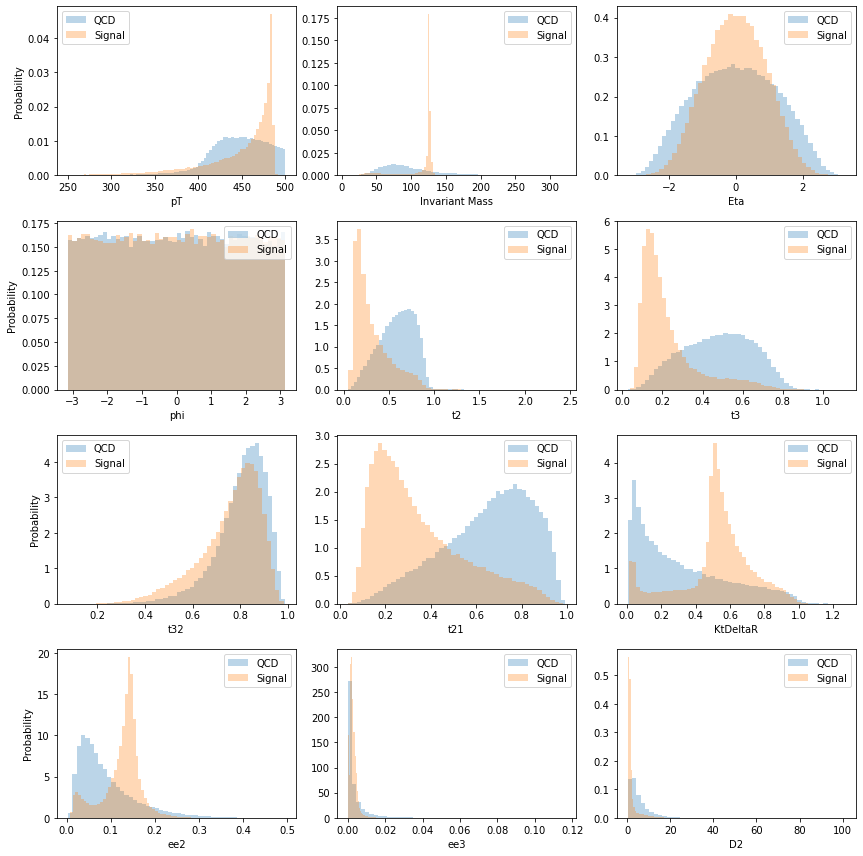

In [119]:
#This can be done more efficiently using a for loop and iterating the axes but I was 
#consilidatin my prior code so this method was more convenient. 

fig,((ax,ax1,ax2),(ax3,ax4,ax5),(ax6,ax7,ax8),(ax9,ax10,ax11))=plt.subplots(4,3,figsize=(12,12))

ax.hist(bkgd["pt"],bins=80,alpha=0.3,density=True,label="QCD")
ax.hist(higgs["pt"],bins=80,alpha=0.3,density=True,label="Signal")
ax.set_ylabel("Probability")
ax.set_xlabel("pT")

ax1.hist(bkgd["mass"],bins=50,alpha=0.3,density=True,label="QCD")
ax1.hist(higgs["mass"],bins=50,alpha=0.3,density=True,label="Signal")
ax.set_ylabel("Probability")
ax1.set_xlabel("Invariant Mass")

ax2.hist(bkgd["eta"],bins=50,alpha=0.3,density=True,label="QCD")
ax2.hist(higgs["eta"],bins=50,alpha=0.3,density=True,label="Signal")
ax.set_ylabel("Probability")
ax2.set_xlabel("Eta")

ax3.hist(bkgd["phi"],bins=50,alpha=0.3,density=True,label="QCD")
ax3.hist(higgs["phi"],bins=50,alpha=0.3,density=True,label="Signal")
ax3.set_ylabel("Probability")
ax3.set_xlabel("phi")

ax4.hist(bkgd["t2"],bins=50,alpha=0.3,density=True,label="QCD")
ax4.hist(higgs["t2"],bins=50,alpha=0.3,density=True,label="Signal")
ax.set_ylabel("Probability")
ax4.set_xlabel("t2")

ax5.hist(bkgd["t3"],bins=50,alpha=0.3,density=True,label="QCD")
ax5.hist(higgs["t3"],bins=50,alpha=0.3,density=True,label="Signal")
ax6.set_ylabel("Probability")
ax5.set_xlabel("t3")

ax6.hist(bkgd["t32"],bins=50,alpha=0.3,density=True,label="QCD")
ax6.hist(higgs["t32"],bins=50,alpha=0.3,density=True,label="Signal")
ax.set_ylabel("Probability")
ax6.set_xlabel("t32")

ax7.hist(bkgd["t21"],bins=50,alpha=0.3,density=True,label="QCD")
ax7.hist(higgs["t21"],bins=50,alpha=0.3,density=True,label="Signal")
ax.set_ylabel("Probability")
ax7.set_xlabel("t21")

ax8.hist(bkgd["KtDeltaR"],bins=50,alpha=0.3,density=True,label="QCD")
ax8.hist(higgs["KtDeltaR"],bins=50,alpha=0.3,density=True,label="Signal")
ax.set_ylabel("Probability")
ax8.set_xlabel("KtDeltaR")

ax9.hist(bkgd["ee2"],bins=50,alpha=0.3,density=True,label="QCD")
ax9.hist(higgs["ee2"],bins=50,alpha=0.3,density=True,label="Signal")
ax.set_ylabel("Probability")
ax9.set_xlabel("ee2")

ax10.hist(bkgd["ee3"],bins=50,alpha=0.3,density=True,label="QCD")
ax10.hist(higgs["ee3"],bins=50,alpha=0.3,density=True,label="Signal")
ax9.set_ylabel("Probability")
ax10.set_xlabel("ee3")

ax11.hist(bkgd["d2"],alpha=0.3,bins=50,density=True,label="QCD")
ax11.hist(higgs["d2"],alpha=0.3,bins=50,density=True,label="Signal")
ax.set_ylabel("Probability")
ax11.set_xlabel("D2")

plt.tight_layout()
ax.legend()
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
ax7.legend()
ax8.legend()
ax9.legend()
ax10.legend()
ax11.legend()
plt.show()

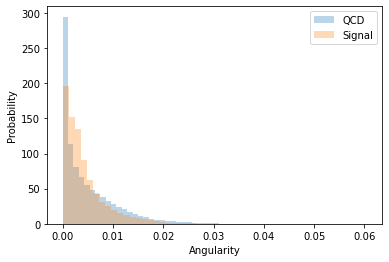

In [120]:
fig,ax=plt.subplots()
ax.hist(bkgd["angularity"],bins=50,alpha=0.3,density=True,label="QCD")
ax.hist(higgs["angularity"],bins=50,alpha=0.3,density=True,label="Signal")
ax.set_ylabel("Probability")
ax.set_xlabel("Angularity")
ax.legend()

Not all features are good discriminators between particles and background. The greater the difference between the respective histograms, the better will our detection significance will be. The distributions overlap greatly for D2,EE3,phi,eta,t32 and Angularity and would give very low significance or low-fidelity detection.  haSome of the more useful quantities are pT and mass and D2. 

ee2,ktdeltaR and t21 show a better difference in pattern between the signal and background. 

pT, invariant mass show a much better discrimination.


<b> 2. Exploring Correlations </b>

In [121]:
import seaborn as sns

<AxesSubplot:>

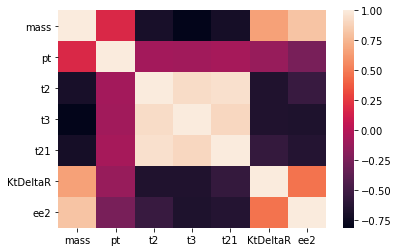

In [122]:
sns.heatmap(higgs[["mass","pt","t2","t3","t21","KtDeltaR","ee2"]].corr())

<AxesSubplot:>

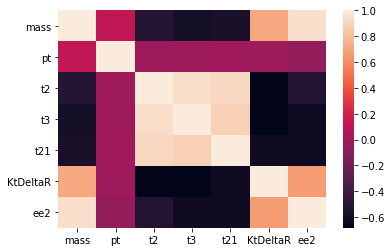

In [123]:
sns.heatmap(bkgd[["mass","pt","t2","t3","t21","KtDeltaR","ee2"]].corr())

In [124]:
higgs["type"]="Higgs"
bkgd["type"]="QCD"
data=pd.concat([higgs,bkgd],axis=0)

<AxesSubplot:>

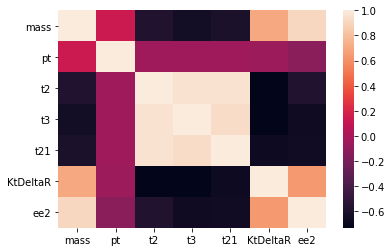

In [125]:
sns.heatmap(data[["mass","pt","t2","t3","t21","KtDeltaR","ee2"]].corr())

<u> Mass </u> <br>
Preliminary analyses shows low correlation between mass and t2,t3,t21. It is higher for mass and pT and KtDeltaR and very high for ee2. 

<u> pT </u> <br>
low: mass,t2,t3,t21,KtDelaR and ee2. 

<u> t2,t3,t21 </u> <br> Very low for mass,pt,KtDeltaR,ee2. <br>High for t3 and t21. 

<u> KtDeltaR </u> <br> Most correlated to ee2 and mass.

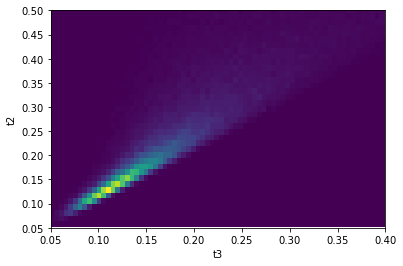

In [126]:
plt.hist2d(higgs["t3"],higgs["t2"],bins=[200,200])
plt.xlim(0.05,0.4)
plt.ylim(0.05,0.5)
plt.xlabel("t3")
plt.ylabel("t2")
plt.show()

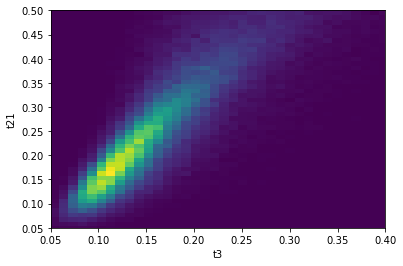

In [127]:
plt.hist2d(higgs["t3"],higgs["t21"],bins=[100,100])
plt.xlim(0.05,0.4)
plt.ylim(0.05,0.5)
plt.xlabel("t3")
plt.ylabel("t21")
plt.show()

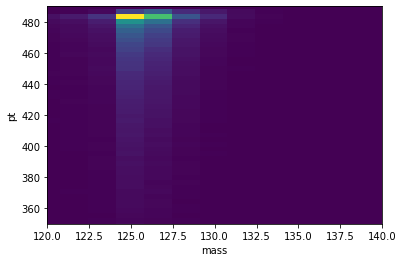

In [128]:
plt.hist2d(x=higgs["mass"],y=higgs["pt"],bins=[80,80])
plt.xlim(120,140)
plt.ylim(350,490)
plt.xlabel("mass")
plt.ylabel("pt")
plt.show()

<AxesSubplot:xlabel='mass', ylabel='ee2'>

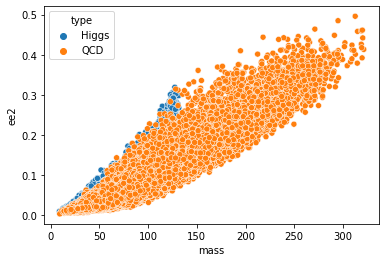

In [132]:
sns.scatterplot(x=data["mass"],y=data["ee2"],hue=data["type"])

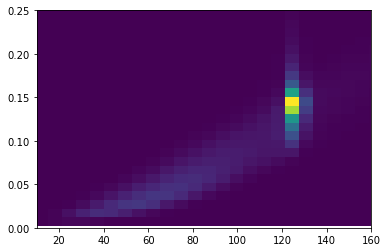

In [130]:
plt.hist2d(data["mass"],data["ee2"],bins=[50,50])
plt.xlim(10,160)
plt.ylim(0,0.25)
plt.show()

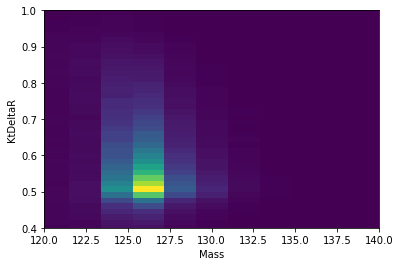

In [43]:
plt.hist2d(higgs["mass"],higgs["KtDeltaR"],bins=70)
plt.xlim(120,140)
plt.ylim(0.4,1)
plt.xlabel("Mass")
plt.ylabel("KtDeltaR")
plt.show()

<b> 3 </b> 



<b> Statistical Question </b>: If we assume our data to be purely QCD with mean=20,000 ,  what is the significance of a (20,000+100) signal?  How is it compared to the 5 sigma for a poisson with mean=20,000 ?

In [83]:
import scipy
from scipy.stats import poisson
from scipy.stats import norm

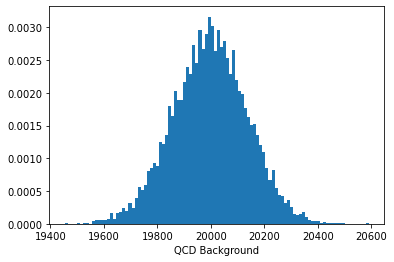

In [89]:
mu=20000
s = np.random.poisson(mu, 10000)
plt.hist(s,bins=100,density=True)
plt.xlabel("QCD Background")
plt.show()

In [99]:
x=20000+100
prob=poisson.cdf(x,mu=mu)
sigma=norm.ppf(prob) 
sigma

0.7112259282313185

In [97]:
sigma_to_prob=norm.cdf(5)
threshold=poisson.ppf(sigma_to_prob,mu=20000)
threshold

20711.0

<b> Answer </b> <br>
The significance of 20100 particles is too low at 0.7 sigma. We would need at least 20711 particles to get a 5 sigma detection significance with a poisson of mean 20000.

<b> 4. </b>

The cuts are chosen to minimize the contribution of qcd bacground while maximizing the contribution of higgs data.
From the above graphs, we can infer the following selections to improve significance:<br><br>
pT> 450 <br>
mass>100 <br>
t2<0.5 <br>
t3<0.3<br>
t21<0.5 <br>
ee2> 0.1 <br>
KtDeltaR>0.4<br>




### About Data: 


In this project we looked at an inclusive search for the standard model Higgs boson in pp collisions at √ s = 13 TeV at the LHC using simulated data. The Higgs bosons are produced with large transverse momentum (pT) and decay to a bottom quark-antiquark pair. The Higgs candidates could be reconstructed as large-radius jets using Calorimeters. Due to large QCD backgorund containmination, the direct 5-sigma observation of this Higgs channel is not accomplished yet. We are going to use a set of training datasets to optimize event selections in order to enhance the discovery sensitivity. The optimal event selections will be applied to a selected pseudo-experiment data. Simulated samples of signal and background events are produced using various Monte Carlo (MC) event generators, with the CMS detector response modeled using the GEANT4 [17] program. 